In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import joblib
import time
np.random.seed(42)

In [19]:
path = "/scratch/pbanerj6/sml-dataset/"
trainSamples = 50000
n_iter = 1000
n_trainSamples = [100,500,1000,10000,20000,50000,75000]

In [20]:
def load_all(fname):
    return pickle.load(open(fname,"rb"))

X_train_all = load_all(path+"X_train_all_90.pkl")
X_val_all = load_all(path+"X_val_all_90.pkl")

In [21]:
def load_y(fname):
    return np.array(pickle.load(open(fname,"rb")))

y_train = load_y(path+"y_train.p")
y_val = load_y(path+"y_val.p")

In [22]:
# truncate train data

X_train_all = X_train_all[0:trainSamples,:]
y_train = y_train[0:trainSamples]


In [23]:
#print (X_train_all[0].shape)
print (X_train_all.shape)
print (y_train.shape)
#print (X_train_all[0])
#print (max(X_train_all[0]))
#print (X_val_all[0].shape)
print (X_val_all.shape)
print (y_val.shape)
#print (X_val_all[0])
#print (max(X_val_all[0]))

(50000, 6000)
(50000,)
(15000, 6000)
(15000,)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# cv=3 [1,99, 349, 649 ,949] , [1, 1599, 1999, 2499]  done

parameters = {
     'n_neighbors':[1, 99, 949, 1999, 2499]
 }

In [25]:
#gs_clf = GridSearchCV(svm.SVC(verbose=True,probability=True,cache_size=7000,max_iter=n_iter,gamma='auto',kernel='linear'), 
#                      parameters, cv=3, iid=True, n_jobs=10, verbose=2)
knn = KNeighborsClassifier()

gs_clf = GridSearchCV(knn, parameters, cv = 3, n_jobs=-1, verbose=50)


In [26]:
stime=time.time()
model = gs_clf.fit(X_train_all, y_train)
print ("GridSearchTime:",time.time()-stime)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 111.6min
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 111.7min remaining: 725.8min
[Parallel(n_jobs=-1)]: Done   3 out of  15 | elapsed: 112.4min remaining: 449.6min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 334.9min remaining: 921.1min
[Parallel(n_jobs=-1)]: Done   5 out of  15 | elapsed: 335.0min remaining: 670.0min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 335.1min remaining: 502.6min
[Parallel(n_jobs=-1)]: Done   7 out of  15 | elapsed: 336.0min remaining: 384.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 336.0min remaining: 294.0min
[Parallel(n_jobs=-1)]: Done   9 out of  15 | elapsed: 339.9min remaining: 226.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 340.3min remaining: 170.1min
[Parallel(n_jobs=-1)]: Done  11 out of  15 | elapsed:

In [27]:
print (model.cv_results_)

print (model.best_score_)
print (model.best_params_)
print (model.best_estimator_)

{'mean_fit_time': array([13.87108191, 13.85423732, 13.82490627, 13.89418077, 14.00236893]), 'std_fit_time': array([0.02496982, 0.02544732, 0.07826314, 0.06024647, 0.06083567]), 'mean_score_time': array([6636.14934882, 6707.02929274, 6722.56296039, 6739.77130834,
       6753.38292519]), 'std_score_time': array([22.64435291, 33.80183914, 17.0446047 , 25.46469287, 20.8423264 ]), 'param_n_neighbors': masked_array(data=[1, 99, 949, 1999, 2499],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 99}, {'n_neighbors': 949}, {'n_neighbors': 1999}, {'n_neighbors': 2499}], 'split0_test_score': array([0.52825774, 0.53431725, 0.51967843, 0.50215983, 0.49994   ]), 'split1_test_score': array([0.53918157, 0.54638186, 0.51920077, 0.50162006, 0.50018001]), 'split2_test_score': array([0.53372135, 0.55616225, 0.50708028, 0.5       , 0.5       ]), 'mean_test_score': array([0.53372, 0.54562, 0.51532, 0.50126

In [28]:
def GridSearchCV_result_temp():
    k_vector= [1, 99, 949, 1999, 2499]
    accuracy_vector= [0.53372, 0.54562, 0.51532, 0.50126, 0.50004]
        
        
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(k_vector,accuracy_vector,label='Accuracy vs k',marker='o')
    
    plt.title("Accuracy vs K")
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    #fig.savefig("knn_k_vs_Acc_plot.png")
    print("Best accuracy= %.4f"%max(accuracy_vector))
    #print(accuracy_vector.index(max(accuracy_vector)))
    print("For k= %d"%k_vector[accuracy_vector.index(max(accuracy_vector))])

Best accuracy= 0.5456
For k= 99


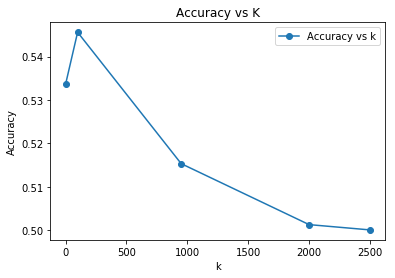

In [29]:
GridSearchCV_result_temp()


In [30]:
#pickle.dump(model,open("SVM_All_Linear_"+str(trainSamples)+"_"+str(n_iter)+".pkl",'wb'))
pickle.dump(model,open("knn_PCA_All_1_99_949_1999_2499"+str(trainSamples)+".pkl",'wb'))

In [31]:

def GridSearchCV_result():
    
    k_vector= [1, 99, 949, 1999, 2499]
    accuracy_vector= [0.53372, 0.54562, 0.51532, 0.50126, 0.50004]
        
        
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(k_vector,accuracy_vector,label='Accuracy vs k',marker='o')
    
    plt.title("Accuracy vs K")
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    #fig.savefig("knn_k_vs_Acc_plot.png")
    print("Best accuracy= %.4f"%max(accuracy_vector))
    #print(accuracy_vector.index(max(accuracy_vector)))
    print("For k= %d"%k_vector[accuracy_vector.index(max(accuracy_vector))])

Best accuracy= 0.5456
For k= 99


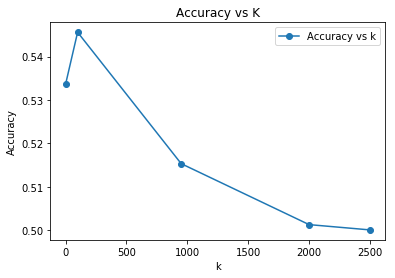

In [32]:
GridSearchCV_result()

In [33]:
X_test_all = load_all(path+"X_test_all_90.pkl")
y_test = load_y(path+"y_test.p")

In [34]:
from scipy.stats import rankdata

def mrrs(out, labels):
#     print(out,labels)
    outputs = np.argmax(out,axis=1)
    mrr = 0.0 
    for label,ranks in zip(labels,out):
        ranks = rankdata(ranks*-1)
        rank = ranks[label]
#         print(rank,ranks)
        mrr+=1/rank
    return mrr/len(labels)

def precision_at(out,labels,prank=1):
    count = 0
    for label,ranks in zip(labels,out):
        ranks = rankdata(ranks*-1)
        rank = ranks[label]
#         print(rank,ranks)
        if rank <= prank:
            count+=1
    return count/len(labels)

def mrrwrapper(qid2c,qid2indexmap,preds_prob):
    labels = []
    out = []
    for qid in qid2c.keys():
        scores = []
        for ix in qid2indexmap[qid]:
            if len(scores) < 6:
                scores.append(preds_prob[ix][1])
        if len(scores) < 6:
            continue
        out.append(scores)
        labels.append(int(qid2c[qid]))
    return mrrs(np.array(out),labels),precision_at(np.array(out),labels,1),precision_at(np.array(out),labels,3)

def load_ranking(fname):
    return pickle.load(open(path+"ranking_"+fname+".p","rb"))

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
valAccuracy = []
testAccuracy = []
mrrScore = []
precisionAt1 = []
precisionAt3 = []

# redefine n_trainSamples[] and remove low values
n_trainSamples = [10000,20000,50000,75000]

# For each of training sample sizes
for eachTrain in n_trainSamples:
    
     # Choose optimum K from GridSearchCV results
    bestModel = KNeighborsClassifier(n_neighbors= model.best_params_['n_neighbors'],  algorithm='auto',n_jobs=-1)


    print("SampleSize:",eachTrain)
    
    stime=time.time()
    bestModel.fit(X_train_all[:eachTrain],y_train[:eachTrain])   
    print("Train Time:%.2f sec"%(time.time()-stime))
    
    stime=time.time()
    preds_val = bestModel.predict(X_val_all)
    accuracy = round(accuracy_score(y_val, preds_val),4)
    valAccuracy.append(accuracy)
    print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Validation Time:%.2f sec"%(time.time()-stime))

    stime=time.time()
    preds_test = bestModel.predict(X_test_all)
    accuracy = round(accuracy_score(y_test, preds_test),4)
    testAccuracy.append(accuracy)
    print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Test Time:%.2f sec"%(time.time()-stime))
    
    stime=time.time()
    preds_test_probs = bestModel.predict_proba(X_test_all)
    qid2c,qid2indexmap = load_ranking("test")
    print (mrrwrapper(qid2c,qid2indexmap,preds_test_probs))
    mrr, pAt1, pAt3 = mrrwrapper(qid2c,qid2indexmap,preds_test_probs)
    mrrScore.append(mrr)
    print("MRR:",mrr)
    print("MRR Time:%.2f sec"%(time.time()-stime))
    print("------------------------------------")
    precisionAt1.append(pAt1)
    precisionAt3.append(pAt3)
    

print ("Val accuracy:")
print (valAccuracy)
print ("Test accuracy:")
print (testAccuracy)
print ("MRR score:")
print (mrrScore)
print ("precision At1:")
print (precisionAt1)
print ("precision At3:")
print (precisionAt3)

SampleSize: 10000
Train Time:2.19 sec
Validation Accuracy: 52.07%
Validation Time:116.68 sec
Test Accuracy: 51.83%
Test Time:117.47 sec
(0.48490533910533773, 0.212, 0.6086666666666667)
MRR: 0.48490533910533773
MRR Time:117.23 sec
------------------------------------
SampleSize: 20000
Train Time:4.88 sec
Validation Accuracy: 53.09%
Validation Time:234.32 sec
Test Accuracy: 52.51%
Test Time:235.82 sec
(0.48188956228956137, 0.21333333333333335, 0.604)
MRR: 0.48188956228956137
MRR Time:237.84 sec
------------------------------------
SampleSize: 50000
Train Time:14.05 sec
Validation Accuracy: 54.98%
Validation Time:544.82 sec
Test Accuracy: 53.94%
Test Time:541.23 sec
(0.5055394901394894, 0.252, 0.634)
MRR: 0.5055394901394894
MRR Time:544.80 sec
------------------------------------
SampleSize: 75000
Train Time:13.66 sec
Validation Accuracy: 54.98%
Validation Time:541.21 sec
Test Accuracy: 53.94%
Test Time:548.58 sec
(0.5055394901394894, 0.252, 0.634)
MRR: 0.5055394901394894
MRR Time:552.44 

In [37]:
def accuracyVisualization():
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,testAccuracy,label='TestAccuracy vs TrainData',marker='o')
    ax.plot(n_trainSamples,valAccuracy,label='ValAccuracy vs TrainData',marker='x')
    plt.title("Accuracy vs TrainData size")
    plt.legend()
    plt.xlabel("TrainData size")
    plt.ylabel("Accuracy")
    fig.savefig("knn99_PCA_All_Accuracy.png")
    #plt.show()

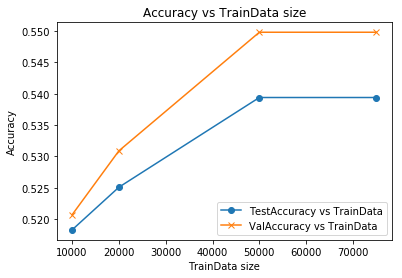

In [38]:
accuracyVisualization()

In [39]:
def mrrVisualization():
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,mrrScore,label='MRR vs TrainData',marker='x')
    plt.title("MRR vs TrainData size")
    plt.legend()
    plt.xlabel("TrainData size")
    plt.ylabel("MRR")
    fig.savefig("knn99_PCA_All_Mrr.png")
    #plt.show()

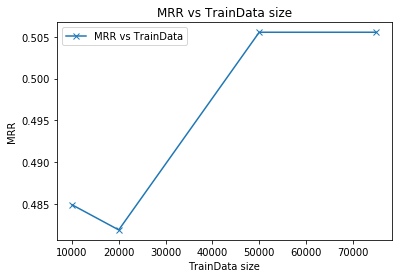

In [40]:
mrrVisualization()

In [41]:
def precisionVisualization():
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,precisionAt1,label='Precision@1 vs TrainData',marker='o')
    ax.plot(n_trainSamples,precisionAt3,label='Precision@3 vs TrainData',marker='x')
    plt.title("Precision vs TrainData size")
    plt.legend()
    plt.xlabel("TrainData size")
    plt.ylabel("Precision")
    fig.savefig("knn99_PCA_All_Precision.png")
    #plt.show()

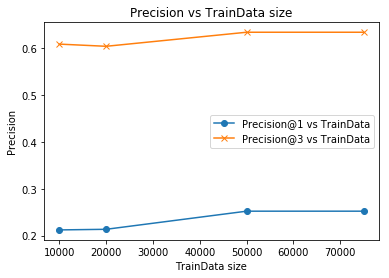

In [42]:
precisionVisualization()